<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/tutorial_redes_neuronales_inn_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a las Redes Neuronales Artificiales

## <span style="color:green">1.Descargar e Importar Tensorflow </span>

In [2]:
#Importar tensorflow
import tensorflow as tf

In [42]:
#Traer a Keras y acostumbrése
from tensorflow import keras

In [4]:
tf.__version__

'2.15.0'

In [5]:
print(tf.keras)

<KerasLazyLoader>


## <span style="color:green">2. Crear Un Clasificador De Imágenes Usando Una API Secuencial </span>

### <span style="color:blue">2.1 Utilizar Keras para cargar el dataset</span>

In [7]:
#llamar cifar10
cifar10 = keras.datasets.cifar10

In [8]:
#Descargar los datos (solo es para este set de datos, en la vida real tus archivos pueden estar en otros formatos)
#Recuerden que x son las imágenes y "y" la etiqueta de esa imagen
(x_train_completo,y_train_completo),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [9]:
#Sacar shape de los datos
x_train_completo.shape

(50000, 32, 32, 3)

Arrojará (No. de imagénes, pixeles x pixeles, componentes RBG)

In [10]:
#Escalar los valores de x (dividir todo entre 255)
x_valid,x_train = x_train_completo[:5000]/255,x_train_completo[5000:]/255

In [11]:
#Escalar los valores de y (dividir todo entre 255)
y_valid,y_train = y_train_completo[:5000]/255,y_train_completo[5000:]/255

In [12]:
#Ajustar x_test
x_test=x_test/255

In [13]:
#Nombrar las clasificaciones de los datos (las pueden poner en inglés si lo prefieren)
nombres_clase = ["avion", "coche", "pajaro", "gato", "venado", "perro", "rana", "caballo", "barco", "camion"]

In [14]:
#Probar con algún ejemplo de nombres de clase
nombres_clase[int(y_test[10][0])]

'avion'

In [15]:
#Probar con otro ejemplo
nombres_clase[int(y_test[0][0])]

'gato'

### <span style="color:blue">2.2 Crear el Modelo </span>

In [16]:
#importar matplotlib
import matplotlib.pyplot as plt
import numpy as np

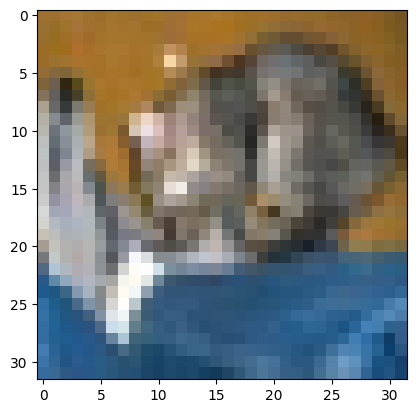

In [17]:
#visualizar la imagen (como humano)
plt.imshow(np.squeeze(x_test[0]))

se supone es un gato jugando con una pata :/

In [18]:
#Crear el objeto para el modelo secuencial de Kera
model = keras.models.Sequential()

In [20]:
#Agregar la primera capa que son las neuronas de recepción (3072 neuronas)
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
#Agregar Capa densa de 300 neuronas con una función de activación ReLU
model.add(keras.layers.Dense(300,activation="relu"))
#Agregar capa densa de 100 neuronas con ReLU
model.add(keras.layers.Dense(100,activation="relu"))
#Agregar capa densa de 10 neuronas (10 categorías) con Sotmax (para tener probabilidad)
model.add(keras.layers.Dense(10,activation="softmax"))

In [21]:
#vemos la visión del modelo que armamos
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953010 (3.64 MB)
Trainable params: 953010 (3.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#otra manera de ver las capas...
model.layers

In [23]:
#en caso de que quiera ocultar una capa
oculta1=model.layers[1]

In [24]:
oculta1.name

'dense'

In [25]:
#ver los pesos de la red neuronal
pesos, bias = oculta1.get_weights()

In [26]:
pesos

array([[-0.04075965, -0.00143493, -0.00597616, ...,  0.03671164,
         0.01341635, -0.01214607],
       [ 0.01619072,  0.03799785, -0.02018998, ..., -0.00303333,
        -0.03993684,  0.03814892],
       [-0.01506439,  0.04024315, -0.00585894, ...,  0.0238528 ,
        -0.01693865,  0.03635772],
       ...,
       [ 0.01405448, -0.0193889 , -0.01308157, ..., -0.00101438,
        -0.00975193,  0.03634217],
       [-0.03234527,  0.01354305, -0.02926583, ..., -0.0191346 ,
         0.00614794, -0.03707264],
       [-0.00599894, -0.00776666,  0.03851501, ...,  0.01278815,
        -0.01919011, -0.03791812]], dtype=float32)

In [27]:
#la primera capa entran 3072 datos y escupe 300
pesos.shape

(3072, 300)

In [28]:
#lo mismo es con los bias...
bias.shape

(300,)

In [29]:
#desplegar los bias que están inicializados en 0
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
#Otra manera de hacer el modelo (Es cuestión de gusto chicas y chicos)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

### <span style="color:blue">2.3 Compilando el modelo </span>

In [32]:
#compilar el modelo con optimizador SGD (Stochastic Gradient Descent) y una función de pérdida sparse_categorical_crossentropy
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### <span style="color:blue">2.4 Entrenar y Evaluar el Modelo </span>

### <span style="color:blue">2.5 Tratando de Arreglar el Fracaso </span>

In [33]:
#Importar pandas y numpy
import pandas as pd
import numpy as np

In [34]:
#Entrenarlo durante 35 epochs
entrenamiento = model.fit(x_train, y_train, epochs=35, validation_data=(x_valid, y_valid))

Epoch 1/35
1407/1407 [==============================] - 28s 19ms/step - loss: 0.0017 - accuracy: 0.0998 - val_loss: 0.0000e+00 - val_accuracy: 0.1010
Epoch 2/35
1407/1407 [==============================] - 26s 19ms/step - loss: 1.1788e-09 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1010
Epoch 3/35
1407/1407 [==============================] - 27s 19ms/step - loss: 8.4770e-10 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1010
Epoch 4/35
1407/1407 [==============================] - 26s 18ms/step - loss: 6.2253e-10 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1010
Epoch 5/35
1407/1407 [==============================] - 26s 18ms/step - loss: 4.4769e-10 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1010
Epoch 6/35
1407/1407 [==============================] - 26s 18ms/step - loss: 3.1259e-10 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1010
Epoch 7/35
1407/1407 [==============================] - 26s 18ms/step - loss: 2.

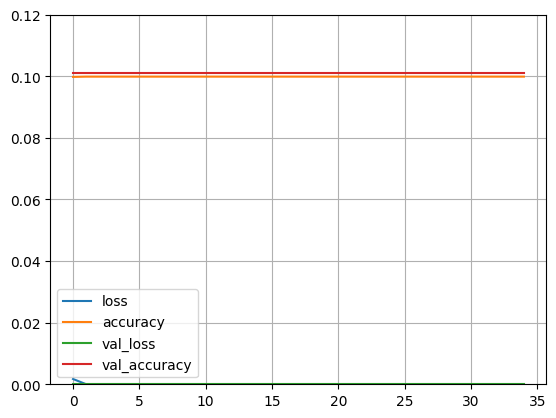

In [36]:
#Armar un dataframe de los datos del modelo que armamos y lo gráficamos
pd.DataFrame(entrenamiento.history).plot()
plt.grid()
plt.gca().set_ylim(0,0.12)
plt.show()

Así se ve un modelo que no sirve

In [37]:
#Ver la calificación de nuestro modelo feo
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 146.3077 - accuracy: 0.1000


[146.3077392578125, 0.10000000149011612]

In [44]:
!pip install keras

In [51]:
#Cambiar resultados a Encriptación uno caliente
from tensorflow.keras.utils import to_categorical

#Manera complicada de decir que habrá 10 clases
num_classes = len(np.unique(y_train))
#Esto convertirá en encriptación uno caliente y le tengo que decir que hay 10 clases
y_train = tf.keras.utils.to_categorical(y_train_completo,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)


#Cambiar el tipo de datos
x_train = x_train_completo.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

#Imprimir como queda para visualizarlo
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


45000 train samples
10000 test samples
5000 validation samples


In [52]:
#Volver hacer el modelo ahora
model = keras.models.Sequential()

In [53]:
#Por flojos para abreviar la red y no poner "keras.layers"
from keras.layers import Dense,Flatten

In [54]:
#capa de entrada
model.add(Flatten(input_shape = x_train.shape[1:]))

In [55]:
#Crea capitas como ya sabes :bb
model.add(Dense(1000, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [56]:
#Compilar el modelo donde los resultados ya no son esparsos por la encriptación uno caliente
#Intentemos otro optimizador que no conocemos (aún)
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [57]:
#Checa como va tu modelo con summary()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_9 (Dense)             (None, 512)               512512    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3590642 (13.70 MB)
Trainable params: 3590642 (13.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
#AHORA SI a correr el model
hist = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Epoch 1/10
1407/1407 [==============================] - 78s 55ms/step - loss: 1.9503 - accuracy: 0.3052 - val_loss: 1.7385 - val_accuracy: 0.3764
Epoch 2/10
1407/1407 [==============================] - 71s 50ms/step - loss: 1.7269 - accuracy: 0.3825 - val_loss: 1.6837 - val_accuracy: 0.3902
Epoch 3/10
1407/1407 [==============================] - 72s 51ms/step - loss: 1.6552 - accuracy: 0.4128 - val_loss: 1.7563 - val_accuracy: 0.3806
Epoch 4/10
1407/1407 [==============================] - 70s 50ms/step - loss: 1.6114 - accuracy: 0.4321 - val_loss: 1.8945 - val_accuracy: 0.3754
Epoch 5/10
1407/1407 [==============================] - 78s 55ms/step - loss: 1.5833 - accuracy: 0.4404 - val_loss: 1.7306 - val_accuracy: 0.3978
Epoch 6/10
1407/1407 [==============================] - 72s 51ms/step - loss: 1.5623 - accuracy: 0.4455 - val_loss: 1.7453 - val_accuracy: 0.4090
Epoch 7/10
1407/1407 [==============================] - 72s 51ms/step - loss: 1.5470 - accuracy: 0.4522 - val_loss: 1.7061 -

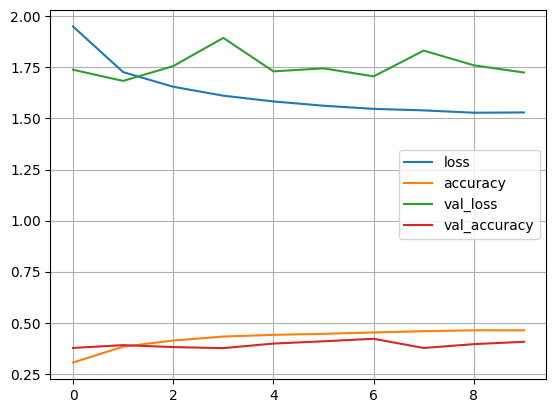

In [59]:
#Hacer gráfica otra vez
pd.DataFrame(hist.history).plot()
plt.grid()
#plt.gca().set_ylim(0,0.12)
plt.show()

La pérdida va disminuyendo y asertividad va subiendo conforme pasan las epochs. No mucho pero es mejora :)

In [60]:
#Vamos a calificar el modelo
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 4.5329 - accuracy: 0.1000


[4.532882213592529, 0.10000000149011612]

### <span style="color:blue">2.6 Hacer predicciones </span>

In [61]:
#Hagamos un set de datos nuevo donde pasemos una imagen que queramos evaluar
x_nuevo = x_test[9:10]

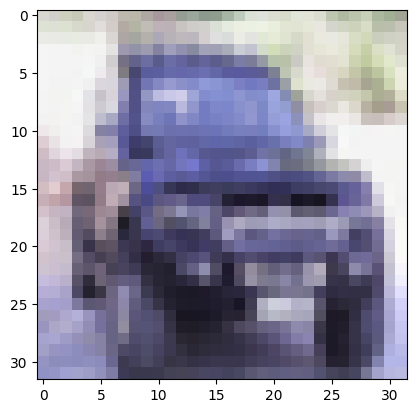

In [62]:
#quiero ver la imagen
plt.imshow(np.squeeze(x_nuevo[0]*255))

In [63]:
#Sacamos las probabilidades de que sea cada cosa
y_proba = model.predict(x_nuevo)
y_proba.round(2)

1/1 [==============================] - 0s 141ms/step


array([[0.  , 0.  , 0.12, 0.05, 0.22, 0.01, 0.58, 0.01, 0.  , 0.  ]],
      dtype=float32)

In [64]:
#recordamos nuestras clasificaciones
nombres_clase

['avion',
 'coche',
 'pajaro',
 'gato',
 'venado',
 'perro',
 'rana',
 'caballo',
 'barco',
 'camion']

Evalúa los ejemplos que pruebes y ve si el clasificador aserto o no